Plot Mean pCO2 from a Takahashi

Plot SST and pCO2-T timeseries

Plot pCO2-Residual at one location

In [1]:
socat_dir = "/data/artemis/workspace/vbennington/SOCAT/processed"
taka_dir = "/data/artemis/observations/LDEO_climatology/v2009"  # centered on year 2000 which is perfect for us

In [2]:
# Import Modules

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import joblib
import cmocean as cm            # really nice colorbars
import matplotlib.pyplot as plt # for making plots
import xesmf as xe
%matplotlib inline
%config InlineBackend.figure_format = 'jpeg'
#%config InlineBackend.print_figure_kwargs = {'dpi':1200}

In [3]:
%run _Val_Mapping.ipynb

# Grab Takahashi Mean pCO2

In [4]:
# Mean pCO2
mean_dir = "/data/artemis/workspace/vbennington/Takahashi"
fnm = f"{mean_dir}/Takahashi_mean_pCO2_2D_mon_1x1_2000.nc"
pco2_mean = xr.open_dataset(f'{fnm}').pCO2_mean

/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


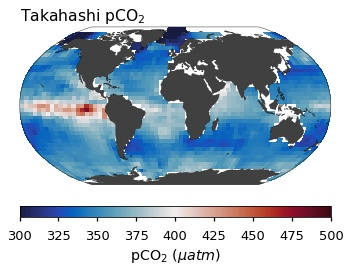

In [5]:
vrange = [300, 500, 5]
fig_shape = (1,1)
cmap = cm.cm.balance
lab = f'pCO$_2$ ($\mu atm$)'
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(6,3.5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = pco2_mean
    wrap_data, wrap_lon = add_cyclic_point(data1.values, coord=pco2_mean.xlon)
    sub = dia.add_plot(lat = pco2_mean.ylat, 
                           lon = wrap_lon, 
                           data = wrap_data, 
                           vrange=vrange[0:2], 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"Takahashi pCO$_2$", 0, loc="left")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
fig.savefig("/home/vbennington/pCO2_Residual/Taka_mean_pco2_map.eps",format='eps',dpi=1200)
plt.show()

# Grab SST

In [6]:
# Load Satellite SST
sat_fname = "/data/artemis/workspace/vbennington/NOAA_SST/processed/SST_mon_198201-202012.nc"
sst_series = xr.open_dataset(f"{sat_fname}").sst    #  [0:-12,:,:]  # Don't need 2020

In [7]:
print(pco2_mean.ylat[140])

<xarray.DataArray 'ylat' ()>
array(50.5)
Coordinates:
    ylat     float64 50.5


In [8]:
print(pco2_mean.xlon[20])

<xarray.DataArray 'xlon' ()>
array(-159.5)
Coordinates:
    xlon     float64 -159.5


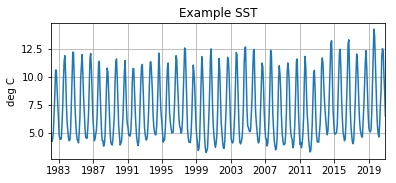

In [9]:
fig = plt.figure(figsize=(6,2.5))
plt.plot(sst_series.time,sst_series[:,140,20].values)
plt.grid(True)
plt.ylabel("deg C")
plt.title("Example SST")
plt.xlim(min(sst_series.time),max(sst_series.time))
fig.savefig("/home/vbennington/pCO2_Residual/sst_timeseries.eps",format='eps',dpi=1200)
plt.show()

# pCO2-T at this location

In [10]:
# Open file with pCO2_DIC, pCO2_T, and SOCAT pCO2
fname = f"{socat_dir}/SOCAT_Takahashi_pCO2_pCO2T_pCO2DIC_2D_mon_1x1_198201-202012.nc"
socat = xr.open_dataset(f'{fname}')

In [11]:
pCO2_T = socat.pCO2_T

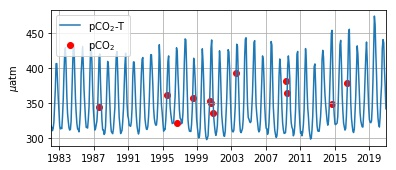

In [12]:
fig = plt.figure(figsize=(6,2.5))
plt.plot(pCO2_T.time,pCO2_T[:,140,20].values,label=f'pCO$_2$-T')
plt.scatter(socat.time,socat.pCO2[:,140,20],color='red',label=f'pCO$_2$')
plt.grid(True)
plt.legend()
plt.ylabel("$\mu$atm")
plt.xlim(min(pCO2_T.time),max(pCO2_T.time))
fig.savefig("/home/vbennington/pCO2_Residual/pCO2T_sst_timeseries.eps",format='eps',dpi=1200)
plt.show()

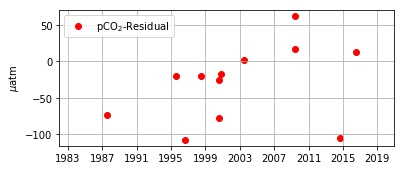

In [13]:
fig = plt.figure(figsize=(6,2.5))
plt.scatter(socat.time,socat.pCO2[:,140,20]-pCO2_T[:,140,20],color='red',label=f'pCO$_2$-Residual')
plt.grid(True)
plt.legend()
plt.ylabel("$\mu$atm")
plt.xlim(min(pCO2_T.time),max(pCO2_T.time))
fig.savefig("/home/vbennington/pCO2_Residual/pCO2Resid_timeseries.eps",format='eps',dpi=1200)
plt.show()

/home/vbennington/.conda/envs/dev2/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


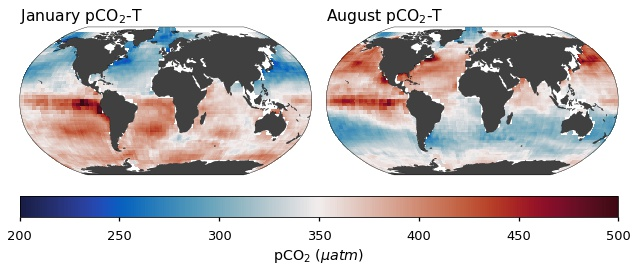

In [14]:
vrange = [200, 500, 5]
fig_shape = (1,2)
cmap = cm.cm.balance
lab = f'pCO$_2$ ($\mu atm$)'
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(13,3.5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    data1 = pCO2_T[1,:,:]
    wrap_data, wrap_lon = add_cyclic_point(data1.values, coord=data1.xlon)
    sub = dia.add_plot(lat = data1.ylat, 
                           lon = wrap_lon, 
                           data = wrap_data, 
                           vrange=vrange[0:2], 
                           cmap=cmap, 
                           ax=0)
    dia.set_title(f"January pCO$_2$-T", 0, loc="left")
    
    data1 = pCO2_T[8,:,:]
    wrap_data, wrap_lon = add_cyclic_point(data1.values, coord=data1.xlon)
    sub = dia.add_plot(lat = data1.ylat, 
                           lon = wrap_lon, 
                           data = wrap_data, 
                           vrange=vrange[0:2], 
                           cmap=cmap, 
                           ax=1)
    dia.set_title(f"August pCO$_2$-T", 1, loc="left")
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    
#fig.savefig("/home/vbennington/pCO2_Residual/Sep_Feb_pCO2T.eps",format='eps',dpi=1200)
plt.show()